### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
print (tf.__version__)
tf.random.set_seed(100)
tf.keras.backend.clear_session()

2.2.0


### Collect Data

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense #Creating a Dense DNN

In [3]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(ytest[0:5])

[9 2 1 1 6]


In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [6]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

#### *There are 60000 records in the dataset for training, and each consists of an image of size 28X28 pixels. The images are of 10 classes, and the class distribution seems to be uniform from the above value_counts().*

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [8]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

Label associated with 0 image:  9
Label associated with 1 image:  0
Label associated with 2 image:  0
Label associated with 3 image:  3
Label associated with 4 image:  0
Label associated with 5 image:  2
Label associated with 6 image:  7
Label associated with 7 image:  2
Label associated with 8 image:  5
Label associated with 9 image:  5


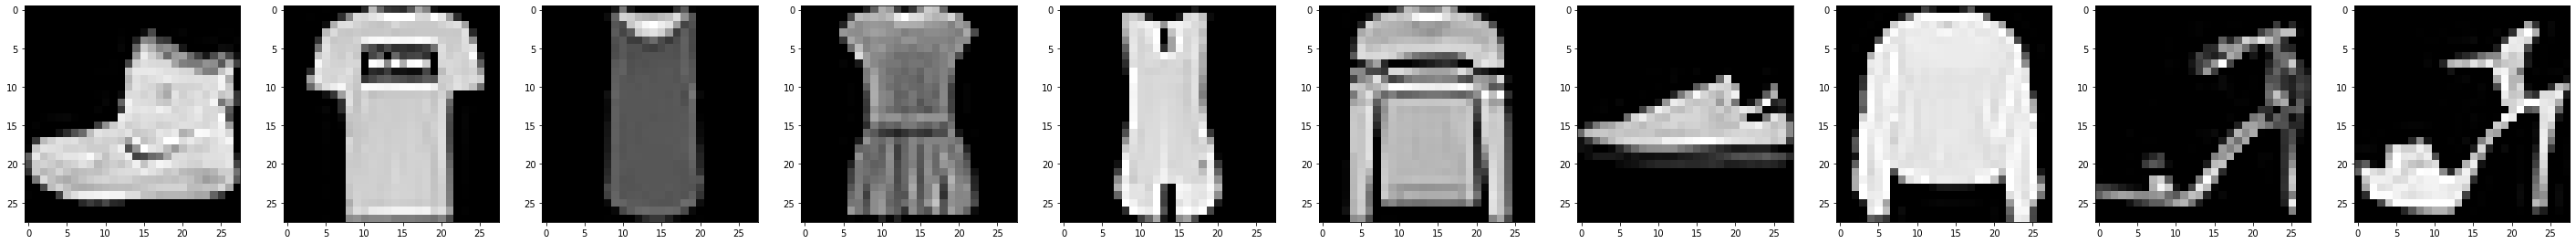

In [9]:
plt.figure(figsize=(50,50))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(xtrain[i,:,:],cmap='gray')
    print ('Label associated with %d image: '%i,ytrain[i])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [10]:
# Initialize the constructor
model1 = Sequential()

In [13]:
# Define model architecture
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model1.add(Dense(500,activation='relu'))
model1.add(Dense(100, activation ='relu'))
model1.add(Dense(10,activation='softmax'))
#Creating a DNN with 2 hidden layers & 1 outer layer (with 10 class/neuron and hence activation function as SOFTMAX)

In [14]:
model1.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

### Execute the model using model.fit()

In [16]:
model1.fit(xtrain, y_train, epochs=10, batch_size=256, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/sample - loss: nan - accuracy: 0.0998
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: nan - accuracy: 0.1000
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: nan - accuracy: 0.1000
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: nan - accuracy: 0.1000
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: nan - accuracy: 0.1000
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: nan - accuracy: 0.1000
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: nan - accuracy: 0.1000
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: nan - accuracy: 0.1000ETA: 0s - loss: nan - accuracy: 0.10
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: nan - accuracy: 0.1000
Epoch

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [43]:
# Define model architecture
#Initialize Sequential model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(500, activation ='relu'))
model2.add(Dense(100, activation ='relu'))
model2.add(Dense(10,activation='softmax'))

In [44]:
model2.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

### Execute the model

In [45]:
model2.fit(xtrain, y_train, epochs=10, batch_size=256, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.8301 - accuracy: 0.7277
Epoch 2/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.5243 - accuracy: 0.8175
Epoch 3/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4619 - accuracy: 0.8390
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4285 - accuracy: 0.8495
Epoch 5/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4065 - accuracy: 0.8563
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3892 - accuracy: 0.8631
Epoch 7/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3756 - accuracy: 0.8668
Epoch 8/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3651 - accuracy: 0.8701
Epoch 9/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3544 - accuracy: 0.8751
Epoch 10/10

In [46]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 446,746
Trainable params: 445,178
Non-trainable params: 1,568
_________________________________________________________________


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [47]:
# Define model architecture
#Initialize Sequential model
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())
model3.add(Dense(500, activation ='relu'))
model3.add(Dense(100, activation ='relu'))
model3.add(Dense(10,activation='softmax'))

In [48]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
#Compile the model
model3.compile(loss='categorical_crossentropy',optimizer=sgd_optimizer,metrics=['accuracy'])

In [49]:
model3.fit(xtrain, y_train, epochs=10, batch_size=256, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 1.5704 - accuracy: 0.5146
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.9982 - accuracy: 0.6986
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.8310 - accuracy: 0.7380
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.7464 - accuracy: 0.7581
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6935 - accuracy: 0.7702
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.6555 - accuracy: 0.7801
Epoch 7/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.6260 - accuracy: 0.7888
Epoch 8/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.6025 - accuracy: 0.7949
Epoch 9/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.5834 - accuracy: 0.7998
Epoch 10/1

In [50]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 446,746
Trainable params: 445,178
Non-trainable params: 1,568
_________________________________________________________________


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and sigmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [18]:
# Define model architecture
#Initialize Sequential model
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(Dense(100,activation='sigmoid'))
model4.add(Dense(100, activation ='sigmoid'))
model4.add(Dense(10,activation='softmax'))

In [19]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
#Compile the model
model4.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Run the model

In [20]:
model4.fit(xtrain, y_train, validation_data=(xtest,y_test), epochs=10, batch_size=256, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/sample - loss: 1.9271 - accuracy: 0.5051 - val_loss: 1.5783 - val_accuracy: 0.6618
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 1.3537 - accuracy: 0.6868 - val_loss: 1.1636 - val_accuracy: 0.7143
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 1.0381 - accuracy: 0.7297 - val_loss: 0.9388 - val_accuracy: 0.7365
Epoch 4/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.8629 - accuracy: 0.7458 - val_loss: 0.8112 - val_accuracy: 0.7479
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.7614 - accuracy: 0.7564 - val_loss: 0.7346 - val_accuracy: 0.7544
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6967 - accuracy: 0.7659 - val_loss: 0.6839 - val_accuracy: 0.7635
Epoch 7/10
60000/60000 [==============================] 

## Review model

In [21]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [27]:
y_predict = model4.predict(xtest)
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[807   5   5  71   7   5  84   0  16   0]
 [  5 940  12  36   5   0   0   0   2   0]
 [ 23   1 614  11 206   2 136   0   7   0]
 [ 36  16   3 832  37   2  69   0   4   1]
 [  0   3  97  32 777   0  85   0   6   0]
 [  0   0   0   1   0 864   0  79   5  51]
 [218   3 120  49 191   2 392   0  25   0]
 [  0   0   0   0   0  60   0 863   1  76]
 [  3   1   8  12   2   9  19   5 939   2]
 [  0   0   0   0   0  22   0  48   1 929]]


In [28]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1000
           1       0.97      0.94      0.95      1000
           2       0.71      0.61      0.66      1000
           3       0.80      0.83      0.81      1000
           4       0.63      0.78      0.70      1000
           5       0.89      0.86      0.88      1000
           6       0.50      0.39      0.44      1000
           7       0.87      0.86      0.87      1000
           8       0.93      0.94      0.94      1000
           9       0.88      0.93      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.79      0.80      0.79     10000



#### *When we ran the 1st model, without normalization, the calculation of accuracy & losses were not possible using SGD optimizer. Then post normalization, we were able to obtain an accuracy of 87.6%. We then tried creating a model with a learning rate of 0.001, i.e. with a 10x drop in learning rate from the default value (0.01), for the same optimizer (SGD), the accuracy in training fell to 80%.*

#### *Thus change in default learning rate had an adverse effect on the performance of the SGD optimizer*

#### *Lastly we developed a model with 3 hidden layers & SGD as optimizer, with learning rate of 0.03. We obtained a similar accuracy of 80%, both across TRAINING & TESTING.* 

### *Clearly, even 0.03 is not the optimal LEARNING RATE for SGD optimizer.*

#### *Thus SGD optimizer can't work without normalization of input data & there is a significant drop in accuracy (by almost 8%) when we change the default learning rate. Even if we increase the learning rate by almost 10x, i.e. 0.001 to 0.03, there is not much improvement in the model performance, and it continues to be poorer than the performance obtained with default LEARNING RATE (0.01)*

In [23]:
# Define model architecture
#Initialize Sequential model
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(Dense(100,activation='relu'))
model5.add(Dense(100, activation ='relu'))
model5.add(Dense(10,activation='softmax'))
model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model5.fit(xtrain, y_train, validation_data=(xtest,y_test), epochs=10, batch_size=256, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5059 - accuracy: 0.8199 - val_loss: 0.4023 - val_accuracy: 0.8537
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3489 - accuracy: 0.8729 - val_loss: 0.3764 - val_accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3099 - accuracy: 0.8868 - val_loss: 0.3563 - val_accuracy: 0.8692
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2843 - accuracy: 0.8951 - val_loss: 0.3475 - val_accuracy: 0.8758
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2636 - accuracy: 0.9024 - val_loss: 0.3490 - val_accuracy: 0.8760
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2433 - accuracy: 0.9090 - val_loss: 0.3368 - val_accuracy: 0.8824
Epoch 7/10
60000/60000 [==============================] 

In [56]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [29]:
y_predict = model5.predict(xtest)
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[798   1   8  17   3   0 166   0   7   0]
 [  3 972   0  16   3   0   4   0   2   0]
 [ 25   0 765   9 100   1  99   0   1   0]
 [ 21   6  10 887  30   1  41   0   4   0]
 [  4   0  54  37 838   0  65   0   2   0]
 [  1   0   0   1   0 959   1  24   2  12]
 [ 87   0  52  22  83   1 747   0   8   0]
 [  0   0   0   0   0  20   0 948   0  32]
 [  6   0   5   6   5   3  11   5 959   0]
 [  0   0   0   0   0   9   1  29   0 961]]


In [30]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.77      0.81      1000
           3       0.89      0.89      0.89      1000
           4       0.79      0.84      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.66      0.75      0.70      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



#### *Lastly, when we use ACTIVATION FUNCTION as ReLU & OPTIMIZER as ADAM, we obtain an accuracy of 93%, which is more than 13% improvement over SIGMOID & MODIFIED SGD. The TESTING accuracy has also improved by 8% to 88%.*

### *Clearly, this combination is a much more preferred*

#### *The TRAINABLE PARAMETERS in each model seems to be a direct function of the number of HIDDEN LAYERS & the number of NEURONS in each layer. The number of NON-TRAINABLE PARAMETERS is CONSTANT across all the models*